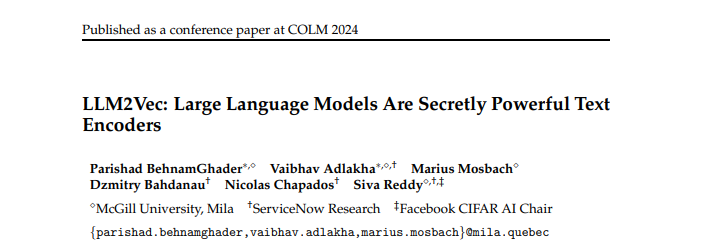

https://arxiv.org/pdf/2404.05961

In [ ]:
!pip install -U -q llm2vec==0.1.4

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.3/474.3 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.4/296.4 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 11.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 17.0.0 which is incompatible.
ibis-framework 8.0.0 requires pyarrow<16,>=2, but you have pyarrow 17.0.0 which is incompatible.


In [ ]:
import os

os.environ["model_name"]="McGill-NLP/LLM2Vec-Sheared-LLaMA-mntp"

In [ ]:
import torch
from llm2vec import LLM2Vec
from transformers import AutoTokenizer, AutoModel, AutoConfig
from peft import PeftModel


tokenizer=AutoTokenizer.from_pretrained(os.getenv('model_name'))

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/871 [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/434 [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.llama.tokenization_llama_fast.LlamaTokenizerFast'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565 - if you loaded a llama tokenizer from a GGUF file you can ignore this message.


In [ ]:
config=AutoConfig.from_pretrained(os.getenv('model_name'), trust_remote_code=True)


config.json:   0%|          | 0.00/753 [00:00<?, ?B/s]

In [ ]:
model=AutoModel.from_pretrained(os.getenv('model_name'), trust_remote_code=True, config=config, torch_dtype=torch.bfloat16, device_map="cuda")

adapter_config.json:   0%|          | 0.00/791 [00:00<?, ?B/s]

modeling_llama_encoder.py:   0%|          | 0.00/8.21k [00:00<?, ?B/s]

attn_mask_utils.py:   0%|          | 0.00/11.1k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/McGill-NLP/LLM2Vec-Sheared-LLaMA-mntp:
- attn_mask_utils.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/McGill-NLP/LLM2Vec-Sheared-LLaMA-mntp:
- modeling_llama_encoder.py
- attn_mask_utils.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


pytorch_model.bin:   0%|          | 0.00/5.38G [00:00<?, ?B/s]

Some weights of the model checkpoint at princeton-nlp/Sheared-LLaMA-1.3B were not used when initializing LlamaEncoderModel: ['lm_head.weight']
- This IS expected if you are initializing LlamaEncoderModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing LlamaEncoderModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


adapter_model.safetensors:   0%|          | 0.00/30.0M [00:00<?, ?B/s]

In [ ]:
model=PeftModel.from_pretrained(
    model,
    os.getenv('model_name')
)

In [ ]:
# Wrapper for encoding and pooling operations
l2v=LLM2Vec(model, tokenizer, pooling_mode="mean", max_length=512)

In [ ]:
instruction=("Given a web search query, retrieve relevant passagers that answer the query:")

queries=[
    [instruction, "How the weather today in Melbourne"],
    [instruction, "Melbourne Parkville suburb"],
]

q_reps=l2v.encode(queries)

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

The attention layers in this model are transitioning from computing the RoPE embeddings internally through `position_ids` (2D tensor with the indexes of the tokens), to using externally computed `position_embeddings` (Tuple of tensors, containing cos and sin). In v4.45 `position_ids` will be removed and `position_embeddings` will be mandatory.


In [ ]:
q_reps.numpy().shape

(2, 2048)

In [ ]:
!wget https://raw.githubusercontent.com/rmarcacini/text-collections/master/complete_texts_csvs/Dmoz-Health.csv

--2024-09-20 14:20:23--  https://raw.githubusercontent.com/rmarcacini/text-collections/master/complete_texts_csvs/Dmoz-Health.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1182768 (1.1M) [text/plain]
Saving to: ‘Dmoz-Health.csv’

Dmoz-Health.csv     100%[===================>]   1.13M  --.-KB/s    in 0.04s   

2024-09-20 14:20:23 (30.6 MB/s) - ‘Dmoz-Health.csv’ saved [1182768/1182768]



In [ ]:
import pandas as pd

dataset = pd.read_csv('Dmoz-Health.csv')

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(dataset, test_size=0.33, random_state=42)

In [ ]:
df_train

,file_name,text,class
1647,and_Diseases_1594311.txt,National Eye Institute - The Cornea and Cornea...,Conditions
2589,Health_1614027.txt,Alison Muir - B.A. Hons. Psych. Psychologist l...,Mental
1700,and_Diseases_1601766.txt,Talk About Sleep A sleep health community prov...,Conditions
5201,Health_and_Safety_1625559.txt,Arizona Emergency Medical Systems For over 25 ...,Public
6004,Health_1628690.txt,Delaware Nursing Care Center Skilled nursing a...,Senior
...,...,...,...
3772,1619360.txt,Society for Nutrition Education (SNE) For prof...,Nutrition
5191,Health_and_Safety_1624499.txt,"Wabasha Fire Department Stations, equipment, f...",Public
5226,Health_and_Safety_1626228.txt,University of Saskatchewan: Department of Comm...,Public
5390,Health_and_Safety_1623932.txt,Gravenhurst Volunteer Fire Department The GVFD...,Public


In [ ]:
df_test

,file_name,text,class
3106,1618765.txt,Nurse CEU.com: Pediatrics List of links to Con...,Nursing
6161,Health_1629048.txt,Dementia: A Guide For The Caregiver A guide an...,Senior
1867,and_Diseases_1596988.txt,"Congenital Toxoplasmosis Includes symptoms, di...",Conditions
3238,1618104.txt,MUSC College of Nursing Medical University of ...,Nursing
5509,Health_1627315.txt,"Malpani Infertility Clinic Located in Bombay, ...",Reproductive
...,...,...,...
2917,Health_1614367.txt,"Elizabeth Fadale, LMHC Private practice locate...",Mental
596,1583133.txt,Human Hand - PalmTherapy A review of Palm Ther...,Alternative
6443,Health_1628680.txt,Connecticut Elder Reference Guide Infoline 211...,Senior
1068,1583908.txt,Holistic Stock Health Holistic health care for...,Animal


In [ ]:
# Filtrando o df_train para as classes Senior e Mental
df_train = df_train[df_train['class'].isin(['Senior', 'Mental'])]
df_train['class'] = df_train['class'].map({'Senior': 0, 'Mental': 1})

# Filtrando o df_test para as classes Senior e Mental
df_test = df_test[df_test['class'].isin(['Senior', 'Mental'])]
df_test['class'] = df_test['class'].map({'Senior': 0, 'Mental': 1})


<ipython-input-16-9708688d7747>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['class'] = df_train['class'].map({'Senior': 0, 'Mental': 1})
<ipython-input-16-9708688d7747>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['class'] = df_test['class'].map({'Senior': 0, 'Mental': 1})


In [ ]:
df_train

,file_name,text,class
2589,Health_1614027.txt,Alison Muir - B.A. Hons. Psych. Psychologist l...,1
6004,Health_1628690.txt,Delaware Nursing Care Center Skilled nursing a...,0
2582,Health_1617262.txt,Behavior OnLine Chat Events Topics of interest...,1
2939,Health_1613963.txt,Counsellingsolution.com Provides online counse...,1
6056,Health_1628543.txt,"Frontier Management Provides assisted living, ...",0
...,...,...,...
6396,Health_1628976.txt,National Family Caregivers Association (NFCA) ...,0
6420,Health_1628833.txt,Rockland Independent Living Center Provides se...,0
2919,Health_1614129.txt,Dr. Justin D'Arienzo Private practice located ...,1
6231,Health_1628916.txt,Individual Care of Texas Residential care and ...,0


In [ ]:
instruction=("Sumarize e extraia as partes importantes do texto:")

L_queries = []
for index,row in df_train.iterrows():
    L_queries.append([instruction, row['text']])

# queries=[
#     L_queries
# ]

q_reps=l2v.encode(L_queries)

Batches:   0%|          | 0/21 [00:00<?, ?it/s]

In [ ]:
df_train['embeddings'] = list(q_reps.numpy())
df_train

<ipython-input-19-1b33a2773a1d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['embeddings'] = list(q_reps.numpy())


,file_name,text,class,embeddings
2589,Health_1614027.txt,Alison Muir - B.A. Hons. Psych. Psychologist l...,1,"[-0.14746094, 1.2890625, -0.390625, 1.1015625,..."
6004,Health_1628690.txt,Delaware Nursing Care Center Skilled nursing a...,0,"[-0.84765625, 1.7421875, -0.28125, 0.020996094..."
2582,Health_1617262.txt,Behavior OnLine Chat Events Topics of interest...,1,"[-0.22558594, 1.015625, -1.34375, -0.51953125,..."
2939,Health_1613963.txt,Counsellingsolution.com Provides online counse...,1,"[-0.46289062, 1.8046875, -1.640625, -0.4160156..."
6056,Health_1628543.txt,"Frontier Management Provides assisted living, ...",0,"[0.048339844, 1.078125, -0.34765625, 0.1826171..."
...,...,...,...,...
6396,Health_1628976.txt,National Family Caregivers Association (NFCA) ...,0,"[-0.58203125, 0.2578125, -0.77734375, 0.496093..."
6420,Health_1628833.txt,Rockland Independent Living Center Provides se...,0,"[-0.40234375, 0.78515625, -0.6875, 0.17773438,..."
2919,Health_1614129.txt,Dr. Justin D'Arienzo Private practice located ...,1,"[-0.15917969, 1.4140625, -1.1328125, 0.3203125..."
6231,Health_1628916.txt,Individual Care of Texas Residential care and ...,0,"[0.26171875, 0.26171875, 0.11669922, 0.3242187..."


In [ ]:
instruction=("Sumarize e extraia as partes importantes do texto:")

L_queries_test = []
for index,row in df_test.iterrows():
    L_queries_test.append([instruction, row['text']])

# queries=[
#     L_queries
# ]

q_reps_test=l2v.encode(L_queries_test)

Batches:   0%|          | 0/11 [00:00<?, ?it/s]

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3,metric="cosine")
knn.fit(q_reps.numpy(), df_train['class'])
y_pred = knn.predict(q_reps_test.numpy())
y_pred

array([0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(df_test['class'], y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       174
           1       0.94      0.94      0.94       163

    accuracy                           0.95       337
   macro avg       0.95      0.95      0.95       337
weighted avg       0.95      0.95      0.95       337

